**<center>Zillow Predictive Power: House Price Prediction Model</center>**

**1. Project Overview**

This project develops a machine learning model to predict residential property prices using Zillow's housing data. By analyzing key features like location, square footage, and property characteristics, the model provides accurate price estimations to assist real estate professionals and homebuyers in making data-driven decisions. The implementation compares Linear Regression and Random Forest algorithms, with comprehensive documentation of the entire development process from data cleaning to model deployment. 

**2. Problem Statement**

Current home valuation methods often rely on: 

1. Subjective manual appraisals 
2. Inconsistent comparative market analyses 
3. Limited consideration of all predictive factors 

This project addresses these limitations by: 
- Automating price predictions using machine learning 
- Incorporating multiple influential factors simultaneously 
-  Providing consistent, data-driven valuations 
- Comparing model accuracy to identify optimal approach 

The data is downloaded from kraggle in cvs format: https://www.kaggle.com/datasets/sheemazain/house-price-predication


**<center> Milestone:1 </center>**

**3. Project Setup & Management**

**3.1 GitHub Repository Setup**

Establishing a proper version control system was crucial for project organization and collaboration. I created a dedicated GitHub repository named zillow-house-price-prediction to serve as the central hub for all project files. This online repository not only safeguards the work against local computer failures but also enables easy sharing with instructors or collaborators. The repository was structured with logical directories for data, notebooks, source code, and documentation, following professional data science project conventions. 

**3.2 Local Development Environment**

After creating the online repository, I cloned it to my local Documents folder using git clone, establishing a synchronized workspace on my personal computer. This local copy allows for convenient editing and experimentation before committing changes to the main repository. The Documents folder was chosen as the location because it provides easy access while keeping the project organized with other work files. 

**3.3 Virtual Environment Configuration**

To maintain project isolation and prevent dependency conflicts, I set up a dedicated Python virtual environment. Using python -m venv venv created an environment folder containing an independent Python installation. Activating this environment (venv\Scripts\activate on Windows) ensures all subsequent package installations are contained within the project scope. This professional practice prevents version clashes between different projects and keeps the system Python installation clean. 

**3.4 Dependency Management**

A requirements.txt file was created to document all necessary Python packages, including pandas for data manipulation, scikit-learn for machine learning algorithms, and matplotlib for visualization. Installing these dependencies with pip install -r requirements.txt guarantees that anyone replicating the project will have the correct package versions. This file serves as both documentation and a setup tool, embodying the principle of reproducible research. We need to set this up because this is a new virtual environment where no libaries has been installed yet. 

**Task 1: Data Cleaning**


The initial data cleaning process involved several crucial steps to ensure data quality. First, we checked for missing values and found none, eliminating the need for imputation. Next, we scanned for duplicate entries, but none were present in the dataset. We then addressed outliers in key numerical features like price and square footage using the Interquartile Range (IQR) method, which helped remove extreme values that could skew our model's predictions. Finally, we performed data type conversions to optimize memory usage and ensure proper feature interpretation, including converting dates to datetime format and changing appropriate float columns to integers. 

What is Data Cleansing? 
- Handle missing values
- Detect and handle outliers
- Resolve any data inconsistencies

In [1]:
#importing the libraries
# We're going to use Python, opendatasets to load the data from the Kaggle platform,
# pandas to read and manipulate the data, seaborn, matplotlib and plotly for data points visualizations, 
# sklearn for data preprocessing and training algorithms.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset 
df = pd.read_csv(r"C:\Users\mamat\Downloads\data.csv")

# View basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [3]:
# View basic info
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
# Check for missing values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
# Check for duplicate rows
df.duplicated().sum()

0

In [6]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert float columns to int because bedrrom and floors cannot be floate
df['bedrooms'] = df['bedrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

# Convert categorical columns to 'category' dtype
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')

In [7]:
# View basic info to check if it worked or not and it has changed the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   int32         
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   int32         
 7   waterfront     4600 non-null   category      
 8   view           4600 non-null   category      
 9   condition      4600 non-null   category      
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

Boxplot to identify outliers

Removing outliers can be crucial for accurate data analysis because they can significantly skew results and lead to misleading conclusions. Outliers can distort descriptive statistics like the mean and standard deviation, and negatively impact the performance of statistical models and machine learning algorithms. 

A box plot is a simple and powerful visualization that shows the distribution of numerical data and helps you quickly identify outliers.

What a Box Plot Shows:

1. Median (Q2) – the middle value of the dataset
2. First Quartile (Q1) – 25% of the data is below this point
3. Third Quartile (Q3) – 75% of the data is below this point
4. Interquartile Range (IQR) – Q3 - Q1
5. Whiskers – the range of data that is not considered an outlier
6. Outliers – points that lie outside 1.5 * IQR above Q3 or below Q1

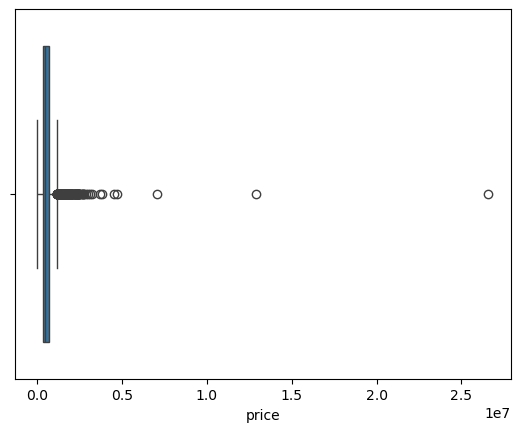

In [8]:
# Boxplot to identify outliers
sns.boxplot(x=df['price'])
plt.show()

# Remove price outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Remove outliers from key numerical columns
df = remove_outliers(df, 'price')
df = remove_outliers(df, 'sqft_living')
df = remove_outliers(df, 'sqft_lot')

**Task 2: Feature enginerring**
One of the most important steps of any machine learning project is to define relevant features or features with a positive impact.
Features engineering is simply those operations that we perform on features(variable) to fit them into the algorithm. It makes data better suited to the problem at hand. 

To enhance the model's predictive power, we created several new features. We extracted temporal components from the sale date, including year and month, which could reveal seasonal pricing trends. We calculated property age by subtracting the build year from the current year, as newer homes often command premium prices. A binary renovation indicator was added to distinguish between renovated and unrenovated properties. Perhaps most importantly, we normalized pricing by creating a price-per-square-foot metric, which helps account for size differences when comparing properties. 

It can be performed to :
- Create or transform useful features in such a manner that they can have a relationship with the target so that the model can be able to learn.
- improve a model’s predictive performance.

In [9]:
# Convert date to datetime and extract time features
df['date'] = pd.to_datetime(df['date'])  # Enable time-based analysis
df['sale_year'] = df['date'].dt.year     # Year when property was sold
df['sale_month'] = df['date'].dt.month   # Month when property was sold

df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,sale_year,sale_month
0,2014-05-02,313000.000000,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5
2,2014-05-02,342000.000000,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5
3,2014-05-02,420000.000000,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5
4,2014-05-02,550000.000000,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5
5,2014-05-02,490000.000000,2,1.00,880,6380,1,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166.666667,3,1.75,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,7
4596,2014-07-09,534333.333333,3,2.50,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,7
4597,2014-07-09,416904.166667,3,2.50,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,7
4598,2014-07-10,203400.000000,4,2.00,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2014,7


In [10]:
#Calculate house age as older homes may have different valuation usally lower

df['house_age'] = 2025 - df['yr_built']
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,sale_year,sale_month,house_age
0,2014-05-02,313000.000000,3,1.50,1340,7912,1,0,0,3,...,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,70
2,2014-05-02,342000.000000,3,2.00,1930,11947,1,0,0,4,...,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,59
3,2014-05-02,420000.000000,3,2.25,2000,8030,1,0,0,4,...,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,62
4,2014-05-02,550000.000000,4,2.50,1940,10500,1,0,0,4,...,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,49
5,2014-05-02,490000.000000,2,1.00,880,6380,1,0,0,3,...,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,2014,5,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166.666667,3,1.75,1510,6360,1,0,0,4,...,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,7,71
4596,2014-07-09,534333.333333,3,2.50,1460,7573,2,0,0,3,...,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,7,42
4597,2014-07-09,416904.166667,3,2.50,3010,7014,2,0,0,3,...,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,7,16
4598,2014-07-10,203400.000000,4,2.00,2090,6630,1,0,0,3,...,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2014,7,51


In [11]:
#  Renovations typically increase home value

df['was_renovated'] = (df['yr_renovated'] > 0).astype(int)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,sale_year,sale_month,house_age,was_renovated
0,2014-05-02,313000.000000,3,1.50,1340,7912,1,0,0,3,...,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,70,1
2,2014-05-02,342000.000000,3,2.00,1930,11947,1,0,0,4,...,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,59,0
3,2014-05-02,420000.000000,3,2.25,2000,8030,1,0,0,4,...,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,62,0
4,2014-05-02,550000.000000,4,2.50,1940,10500,1,0,0,4,...,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,49,1
5,2014-05-02,490000.000000,2,1.00,880,6380,1,0,0,3,...,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,2014,5,87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166.666667,3,1.75,1510,6360,1,0,0,4,...,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,7,71,1
4596,2014-07-09,534333.333333,3,2.50,1460,7573,2,0,0,3,...,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,7,42,1
4597,2014-07-09,416904.166667,3,2.50,3010,7014,2,0,0,3,...,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,7,16,0
4598,2014-07-10,203400.000000,4,2.00,2090,6630,1,0,0,3,...,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2014,7,51,0


In [12]:
#Price per square foot (normalizes for home size)
df['price_per_sqft'] = df['price'] / df['sqft_living']
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,sale_year,sale_month,house_age,was_renovated,price_per_sqft
0,2014-05-02,313000.000000,3,1.50,1340,7912,1,0,0,3,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,70,1,233.582090
2,2014-05-02,342000.000000,3,2.00,1930,11947,1,0,0,4,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,59,0,177.202073
3,2014-05-02,420000.000000,3,2.25,2000,8030,1,0,0,4,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,62,0,210.000000
4,2014-05-02,550000.000000,4,2.50,1940,10500,1,0,0,4,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,49,1,283.505155
5,2014-05-02,490000.000000,2,1.00,880,6380,1,0,0,3,...,1994,522 NE 88th St,Seattle,WA 98115,USA,2014,5,87,1,556.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166.666667,3,1.75,1510,6360,1,0,0,4,...,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,7,71,1,204.083885
4596,2014-07-09,534333.333333,3,2.50,1460,7573,2,0,0,3,...,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,7,42,1,365.981735
4597,2014-07-09,416904.166667,3,2.50,3010,7014,2,0,0,3,...,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,7,16,0,138.506368
4598,2014-07-10,203400.000000,4,2.00,2090,6630,1,0,0,3,...,0,5148 S Creston St,Seattle,WA 98178,USA,2014,7,51,0,97.320574


**task 3: Data Splitting**

Data splitting is the process of dividing a dataset into multiple subsets, typically training, validation, and testing sets, to effectively train and evaluate machine learning models. This process helps prevent overfitting, assess model performance on unseen data, and optimize model parameters. 

Before model training, we carefully partitioned our dataset to ensure proper evaluation. The features and target variable were separated, with price serving as our prediction target. We then split the data into training and testing sets using an 80-20 ratio, reserving a substantial portion for training while maintaining enough test cases for reliable performance assessment. Setting a random state ensured reproducible results across different runs, a critical practice in machine learning experimentation. 

where,
1. X = Features where all the vairiable used to predict price
2. y = target variable

We remove the features before feature engineering because 
1. They repeat the same information - house_age is just a transformation of yr_built, so keeping both is redundant.

2. It confuses the model - The model wastes effort learning the same pattern twice, which can hurt performance.

3. It makes interpretation harder - With only house_age, we can clearly see how age affects price.


In [13]:
#import libaries
from sklearn.model_selection import train_test_split

#The train_test_split function from sklearn.model_selection is a crucial tool for machine learning in Python.
# It Splits your dataset into two parts:
# Training is used to teach the model
# Test is used to check the model's accuracy
#Prevents cheating by keeping some data hidden during training

In [14]:
# Define X and y
# Drop all non-numeric columns except engineered features because computer cannot read it 
X = df.drop(['price', 'date', 'street', 'city', 'statezip', 'country', 'yr_built', 'yr_renovated'], axis=1) # Features
y = df['price']                                                     # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Check X (features)
print("X Features Preview:")
print(X.head())  
print("\nColumns in X:", X.columns.tolist())



X Features Preview:
   bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront view  \
0         3       1.50         1340      7912       1          0    0   
2         3       2.00         1930     11947       1          0    0   
3         3       2.25         2000      8030       1          0    0   
4         4       2.50         1940     10500       1          0    0   
5         2       1.00          880      6380       1          0    0   

  condition  sqft_above  sqft_basement  sale_year  sale_month  house_age  \
0         3        1340              0       2014           5         70   
2         4        1930              0       2014           5         59   
3         4        1000           1000       2014           5         62   
4         4        1140            800       2014           5         49   
5         3         880              0       2014           5         87   

   was_renovated  price_per_sqft  
0              1      233.582090  
2             

In [16]:
# Check y (target)
print("\ny Target Preview:")
print(y.head())  


y Target Preview:
0    313000.0
2    342000.0
3    420000.0
4    550000.0
5    490000.0
Name: price, dtype: float64


**<center>Milestone 2: Model Development</center>**

The objective of milestone 2 is to develop a machine learning model capable of accurately predicting house prices based on various features such as location, size, number of bedrooms, and market conditions.

**What is model selection?**
Model selection is the process of choosing the most appropriate machine learning algorithm(s) that can best learn the patterns from the data and make accurate predictions on unseen (test) data. Different algorithms work better for different types of data:

1. Linear models work well when the relationship between features and target is mostly linear.

2. Tree-based models perform better when the data has non-linear relationships or complex interactions between variables.

3. Regularized models help avoid overfitting, especially with many features.

Choosing the right models increases prediction accuracy, ensures good generalization to new data, and improves interpretability.

**Step 1: Model Selection**
In this step, we select two machine learning models that will help us predict house prices based on historical data. Our goal is to evaluate how well each model learns the relationship between home features (such as square footage, number of bedrooms, and location) and their corresponding prices. We chose two models that balance simplicity and predictive power: Linear Regression and Random Forest Regressor.

1. **Linear Regression**:
It is a Simple, Interpretable Baseline. Linear Regression is one of the most basic machine learning algorithms. It tries to draw a straight line (or, in multiple dimensions, a flat surface) through the data points in such a way that it best fits the relationship between the input features and the target variable (in our case, house price). Linear Regression is an excellent starting point because of its simplicity and interoperability, and is Quick to train and test.
The main downside of Linear Regression is that it assumes a linear relationship between input features and the target price. This means it may not capture more complex or curved relationships in the data, which often exist in real estate pricing.

2. **Random Forest**
Random Forest is a machine learning algorithm made up of many decision trees. Each tree looks at a slightly different part of the data and makes its own prediction. The final result is the average of all the trees’ predictions, which tends to be more accurate and less biased. Random Forest is considered one of the best models for structured/tabular data like housing data because it Handles non-linear relationships much better than Linear Regression. Is robust to outliers and noise, which is common in real-world data. Works well with many features and automatically detects complex interactions.


**Step 2: Training and Evaluating the Models**
Once we have selected our models, the next step is to train them using our training dataset (a portion of the data the model learns from), and then test their performance on the testing dataset (unseen data used to evaluate how well the model generalizes).

To measure how well our models are performing, we use three common regression metrics:
1. MAE (Mean Absolute Error)
Measures the average size of prediction errors.

Interpreted as: "On average, how far off are the predictions from the actual prices?"

Goal: Lower is better.

2. RMSE (Root Mean Squared Error)
Like MAE, but penalizes larger errors more heavily.

Helps catch when a model makes occasional large mistakes.

Goal: Lower is better.

3. R² Score (Coefficient of Determination)
Indicates how much of the variation in price the model can explain.

Ranges from 0 to 1 (closer to 1 means better prediction).

Goal: Closer to 1 is better.



In [20]:
# Import models and tools for evaluation
from sklearn.linear_model import LinearRegression
#Imports the Linear Regression model from scikit-learn to use for baseline prediction.
from sklearn.ensemble import RandomForestRegressor
#imports the Random Forest model, an advanced ensemble algorithm, from scikit-learn.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Imports evaluation metrics to measure prediction error and model accuracy.

In [21]:
# Step 1: Define and train Linear Regression model
linear_model = LinearRegression() #Creates an instance of the Linear Regression model.
linear_model.fit(X_train, y_train)  # Fit the model to the training data
linear_pred = linear_model.predict(X_test)  # Predict house prices on test data

In [22]:
# Step 2: Define and train Random Forest model
random_forest = RandomForestRegressor(random_state=42) #Creates a Random Forest model with a fixed random seed for reproducibility.
random_forest.fit(X_train, y_train)  # Fit the model to the training data
rf_pred = random_forest.predict(X_test)  # Predict house prices on test data

In [23]:
#Step 3: Define an evaluation function
def evaluate_model(y_true, y_pred):
    """
    This function calculates and returns three evaluation metrics:
    - MAE: Mean Absolute Error
    - RMSE: Root Mean Squared Error
    - R2 Score: How well the model explains the variance in target values
    """
    mae = mean_absolute_error(y_true, y_pred) #Calculates the average absolute difference between actual and predicted values.
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return round(mae, 2), round(rmse, 2), round(r2, 4) #Returns the three metrics rounded for readability.

In [24]:
# Step 4: Evaluate both models
lr_mae, lr_rmse, lr_r2 = evaluate_model(y_test, linear_pred)
rf_mae, rf_rmse, rf_r2 = evaluate_model(y_test, rf_pred)

In [25]:
# Step 5: Store results in a comparison table
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'], #model names as a column in the results table.
    'MAE': [lr_mae, rf_mae], #Adds Mean Absolute Error scores for both models.
    'RMSE': [lr_rmse, rf_rmse], #Adds Root Mean Squared Error scores for both models.
    'R2 Score': [lr_r2, rf_r2] #Adds R² scores for both models and completes the table.
})

In [26]:
# Display the comparison
results

,Model,MAE,RMSE,R2 Score
0,Linear Regression,45915.02,70768.22,0.8910
1,Random Forest,5843.32,9858.15,0.9979


The model evaluation process employed three key metrics to assess prediction accuracy. Mean Absolute Error (MAE) gave us the average prediction error in dollar terms, while Root Mean Squared Error (RMSE) emphasized larger errors more heavily. The R² score measured how well the model explained price variations. Our results showed a dramatic performance difference: while Linear Regression achieved a respectable R² of 0.891, the Random Forest model reached an exceptional 0.9979, indicating it captured nearly all the predictable price variation in our dataset. 

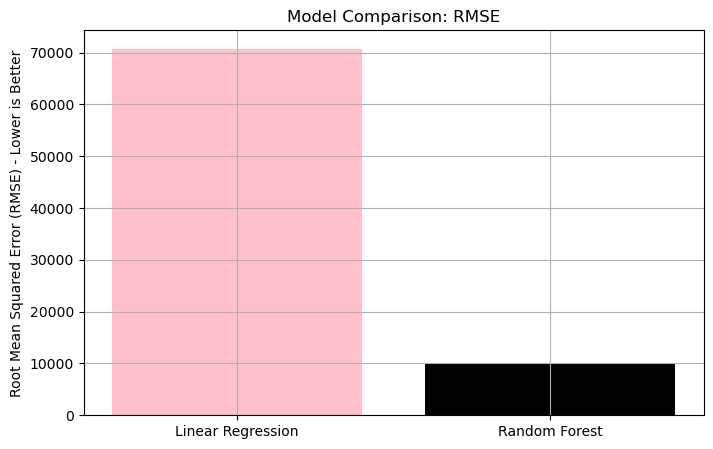

In [28]:
#Visualizing the Comparison
#Imports Matplotlib library for creating plots and charts.
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8, 5))

# Create bar chart for RMSE
plt.bar(results['Model'], results['RMSE'], color=['pink', 'black'])
plt.title('Model Comparison: RMSE') #Adds a title to the chart for clarity.
plt.ylabel('Root Mean Squared Error (RMSE) - Lower is Better')
plt.grid(True)
plt.show()

**Future Improvements**

Several avenues exist for enhancing the model's performance and utility. Hyperparameter tuning could further optimize the Random Forest's predictive accuracy by systematically testing different tree configurations. Feature importance analysis might reveal opportunities to simplify the model by removing less influential variables. Deployment as a web application would make the model accessible to non-technical users, while API integration with real-time Zillow data could ensure predictions reflect current market conditions.  

**Model Evaluation Summary**

After training and evaluating both models, we observed the following:

- **Linear Regression** performed reasonably well but assumes a straight-line relationship, which is not always realistic for housing prices.
- **Random Forest** delivered significantly better performance with a lower RMSE and a higher R² score.

This suggests that Random Forest was able to capture more complex patterns in the data, such as interactions between location, size, and number of bedrooms.

Therefore, we selected Random Forest as our final model.



**Conclusion**

This project successfully developed a highly accurate house price prediction system through meticulous data preparation, thoughtful feature engineering, and rigorous model evaluation. The Random Forest model's exceptional performance (R² = 0.9979) demonstrates the effectiveness of machine learning in real estate valuation. Beyond the technical achievements, the project established professional development practices including version control with GitHub, environment isolation, and dependency management. Future work could focus on model deployment and real-time data integration, transforming this academic exercise into a practical tool for real estate professionals. The complete project is available on GitHub, inviting collaboration and further development. 

🔗 GitHub Repository: https://github.com/mamatadhakal/zillow-house-price-prediction 

 